In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Closed_deals

In [2]:
# carga del dataset y muestreo de 10 registros aleatorios
Closed_deals = pd.read_csv('Datasets_original/olist_closed_deals_dataset.csv')
Closed_deals.sample(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
707,8e3a0c64471d95b0099a960973289946,e94b64dc6979b302a5a5be1662c83bb6,a8387c01a09e99ce014107505b92388c,85fc447d336637ba1df43e793199fbc8,2018-05-04 03:00:00,home_decor,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
479,16a50d670cfa9afa1ebd0022240fb0f9,2866098c2a38fb723ee05f5b65635df0,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-09 15:46:42,fashion_accessories,online_beginner,NaN,NaN,NaN,NaN,reseller,NaN,0.0
288,ed1f42da2c5662307df13fe5648b05bf,89c4c1dfaab405a37514bda5243b0206,34d40cdaf94010a1d05b0d6212f9e909,a8387c01a09e99ce014107505b92388c,2018-08-24 03:00:00,sports_leisure,online_small,cat,NaN,NaN,5-20,reseller,100.0,0.0
622,6fec8c1ba9b9aa79bd26e09fc8aae3eb,603bb4eeb3f0927e59e253357a9ca06b,9e4d1098a3b0f5da39b0bc48f9876645,85fc447d336637ba1df43e793199fbc8,2018-03-29 13:49:44,handcrafted,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
122,d6e0ddfc5b05597877a7d5036789a3a1,4125d9385a25e82d2f72d3a0fd55bc3f,a8387c01a09e99ce014107505b92388c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-05 15:06:11,home_decor,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
787,a57bf18e19b6b17e3d4fbc20561e2055,2a17b229ca84523393b003b7e0bfae63,f42a2bd194f7802ab052a815c8de65b7,9d12ef1a7eca3ec58c545c678af7869c,2018-08-20 14:41:13,toys,online_small,"eagle, cat",True,False,unknown,manufacturer,100.0,50000.0
643,e8caf5068d097fe43a132fbc1152bdd8,26677ff8d8321b864317019c728ac010,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-04-12 03:00:00,construction_tools_house_garden,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
235,b8bb2a1d59f4ecae0646fc039b75391e,fe87f472055fbcf1d7e691c00b1560dc,56bf83c4bb35763a51c2baab501b4c67,495d4e95a8cf8bbf8b432b612a2aa328,2018-01-23 12:41:16,home_decor,online_medium,NaN,NaN,NaN,NaN,reseller,NaN,0.0
543,0456932dafd6f6b56f142efaa19ea8ed,c38c6d00a783927b6a3df86ea650ed4f,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-04-27 20:10:02,audio_video_electronics,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0
103,080261e4427a081fc6e637b654f590ee,ade45994b717ccee333492330fbf037b,068066e24f0c643eb1d089c7dd20cd73,85fc447d336637ba1df43e793199fbc8,2018-03-14 12:18:20,audio_video_electronics,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [3]:
# tamaño del dataset
Closed_deals.shape

(842, 14)

In [4]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [5]:
# descripcion de las columnas numéricas
Closed_deals.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [6]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariciones
Closed_deals.describe(include=['O'])

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type
count,842,842,842,842,842,841,836,665,63,64,66,832
unique,842,842,32,22,824,33,8,9,2,2,6,3
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller
freq,1,1,140,133,6,105,332,407,58,54,22,587


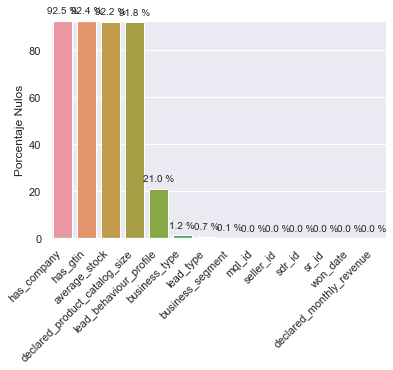

In [7]:
# cuantos datos nulos por columna se encuentran
valores=Closed_deals.isna().sum().sort_values(ascending=False)*100/Closed_deals.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- De un total de 842 registros las columnas has_company, has_gtin, average_stock y declared_product_catalog_size tiene mas del 90 % de sus datos faltantes
- Esta tabla no aporta datos muy relevantes

## Customers

In [8]:
# carga del dataset y muestreo de 10 registros aleatorios
Customers = pd.read_csv('Datasets_original/olist_customers_dataset.csv')
Customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3101,a28fc82d5947b4c781e56085385d7600,7ca5260cc576f40a29e0a40dd4d3fa0a,1302,sao paulo,SP
65337,5f8701c124f5456334c36d83fa44a2a8,9b1bbe55617d7e8753cb49776d952a5b,36070,juiz de fora,MG
54422,5eed54f1f404f00ff0d44be6b120dd48,dc647995a5eae1f95876da6576f5e8fe,88915,maracana,SC
32610,0c73d3ffa5eda2d98e6f4474a8e610b0,7fbcf0382792e1e2d10669c049e8fa8a,9060,santo andre,SP
48903,906240da12be29400c2914d820793e4f,3e7d8098857e14a895d117c80f91e547,35700,sete lagoas,MG
22700,2f08bb2fb46afb0cb9375f5e8be8ff85,8de0790929f774d29258c29f9bc0c481,22720,rio de janeiro,RJ
32779,3e345e7e395a3ddd11abf786d6d74e3e,f8c6e78ad5467fb3a1e2e08aaf7d4755,96810,santa cruz do sul,RS
14393,ab63b05f2047754f13cc5fd06bb3e614,4777ea23e9d2b713832376747e89105c,35790,curvelo,MG
30476,93c614a0e7397b6bf4173f3c62cc0c87,cea24d7104b107365c53eb0cc5c4eb66,81820,curitiba,PR
69959,3a7841008ec6759d4e33345a3e146606,583ac90d6f69ebdb989e08e5318d5389,49032,aracaju,SE


In [9]:
# tamaño del dataset
Customers.shape

(99441, 5)

In [10]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
# descripcion de las columnas numéricas 
Customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Customers.describe(include=['O'])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


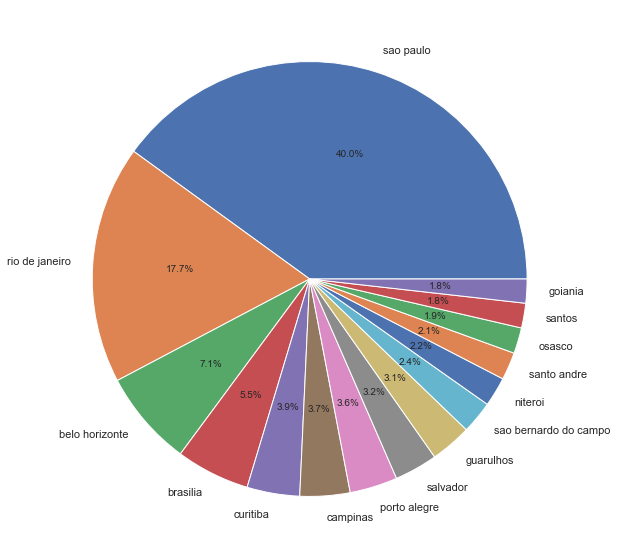

In [13]:
#15 ciudades con mayor cantidad de clientes
val=Cantidad_por_ciudad=Customers.groupby(["customer_city"]).count().sort_values(by=["customer_id"],ascending=False).drop_duplicates("customer_id")["customer_id"].head(15)
plot = val.plot.pie(ylabel="",subplots=True, figsize=(20, 10),autopct='%1.1f%%')

- Analizando Customers faltan datos de customers_unique_id que no hay referencia de como fueron creados esos codigos
- Esta tabla se puede utilizar para saber de qué ciudades provienen los consumos

## Geolocation

In [14]:
# carga del dataset y muestreo de 10 registros aleatorios
Geolocation = pd.read_csv('Datasets_original/olist_geolocation_dataset.csv')
Geolocation.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
20200,2073,-23.501452,-46.609307,sao paulo,SP
503008,27175,-22.631383,-43.901150,pirai,RJ
359069,15990,-21.600223,-48.368258,matao,SP
243056,9950,-23.684707,-46.586555,diadema,SP
853110,81750,-25.520971,-49.240477,curitiba,PR
102636,4747,-23.657594,-46.698906,sao paulo,SP
770744,68470,-2.003183,-49.861219,oeiras do para,PA
926265,89290,-26.267066,-49.365559,sao bento do sul,SC
775381,69060,-3.092339,-59.997764,manaus,AM
756776,65062,-2.530655,-44.246340,sao luis,MA


In [15]:
# tamaño del dataset
Geolocation.shape

(1000163, 5)

In [16]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
# descripcion de las columnas numéricas
Geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [18]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Geolocation.describe(include=['O'])

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


- Esta tabla puede servir para ubicar las ciudades correctamente en objeto mapa del Dashboard.

## Marketing

In [19]:
# carga del dataset y muestreo de 10 registros aleatorios
Marketing = pd.read_csv('Datasets_original/olist_marketing_qualified_leads_dataset.csv')
Marketing.sample(10)

,mql_id,first_contact_date,landing_page_id,origin
6062,49707cf9a38a9b8ee27e0de996121283,2018-05-24,9fa37f5177115156b1814ffc237402a6,paid_search
5857,a8a5204dd969d34ddbd26915537bd937,2018-03-22,e492ee5eaf1697716985cc6f33f9cd9b,email
7550,1654b4d90dd364d2796bdbd590189e7d,2018-03-29,8b1eeb056311220fd13bb7bae8ebe596,direct_traffic
2595,dad2d19c60c361ea558c6a6fef7155d7,2018-03-09,e492ee5eaf1697716985cc6f33f9cd9b,email
5721,65e0bce9207bd3a5a51e0d2b568a6214,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search
373,b38700450d76fa2e5c3498b9218b9bc6,2018-01-25,da14b7e2eb0d1eecf65abbd05a31c87d,paid_search
7968,876dcde308d3410fbdb2bfefc5ffea06,2018-04-28,30534107aa0013db92899c96a1017d0b,social
3246,c3a1f23a07d6b7376ed3aae61d18a7a6,2018-03-16,b76ef37428e6799c421989521c0e5077,unknown
5053,a451ee22deede109dbb5b96fd7aae4e8,2017-09-14,ef0b482996664cc1107b9051efd3ca84,organic_search
2619,50ccab9fbc343b7cf1a1f149bf4facfd,2018-01-08,22c29808c4f815213303f8933030604c,organic_search


In [20]:
# tamaño del dataset
Marketing.shape

(8000, 4)

In [21]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [22]:
# descripcion de las columnas numéricas
Marketing.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [23]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Marketing.describe(include=['O'])

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [24]:
# cuantos datos nulos por columna se encuentran
Marketing.isna().sum()*100/Marketing.shape[0]

mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
origin                0.75
dtype: float64

- Esta tabla no aporta datos significativos para el análisis que queremos realizar

## Order_items

In [25]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_items = pd.read_csv('Datasets_original/olist_order_items_dataset.csv')
Order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
102024,e78cde66f03731202b0f5e082b0b0cff,1,b60856ce32d90658dbf99b9485327c25,8b321bb669392f5163d04c59e235e066,2018-03-15 19:31:40,9.00,15.23
50852,73a331a84d88cbe29024744ea908b253,1,6bb340ddddf26fad46161b199d171cdd,f262cbc1c910c83959f849465454ddd3,2018-01-22 20:10:27,169.99,13.53
96315,da95823b29f9ce7bcc4deebe1e568aff,1,e85d91619b497e98754390b6198a9818,4b9750c8ad28220fe6702d4ecb7c898f,2018-08-24 11:30:49,134.90,9.69
47385,6bba56a94dd91fb13b3e8f412d518bbd,1,9d0bb30eed80184666c8acad23921283,1bb2bdb95f4841f1bba2c0d2cd83d3c9,2018-03-26 03:35:43,19.95,15.23
13175,1deb5e48c7ba534c27d83f4a6afea25f,1,edd087ed331c3ce178ec3489b9ecf117,1bb2bdb95f4841f1bba2c0d2cd83d3c9,2018-01-02 11:58:22,274.95,17.55
93309,d37a4faa7cb8cd88246d73aee035a327,1,f8b624d4e475bb8d1bddf1b65c6a64f6,b410bdd36d5db7a65dcd42b7ead933b8,2018-06-13 12:15:57,179.00,47.69
42820,617f3ac92b6ecb2e873e6075d9f936d7,1,ea44caac707f7f1325182a538007f838,855668e0971d4dfd7bef1b6a4133b41b,2017-09-04 09:35:15,50.00,17.60
16599,25fc8722bbbe6078d34f792c3cce00fc,1,ddcb7473fdc5368c019e3ef6fbde816b,5d0363b33554b373851fc1622e4d5f3c,2018-05-14 12:16:59,50.90,15.44
51380,74d17f79f897a6ed435142094b225a89,1,54d798aec2c073d2d403f66ee33ddbe4,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-03-15 08:42:31,39.90,9.34
26011,3b28f0058ea921e275c87efadc8f7c32,1,134957eeec87be2414ac629ee0b947a4,87142160b41353c4e5fca2360caf6f92,2017-08-08 03:03:48,19.90,17.63


In [26]:
# tamaño del dataset
Order_items.shape

(112650, 7)

In [27]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# descripcion de las columnas numéricas
Order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<AxesSubplot:xlabel='price'>

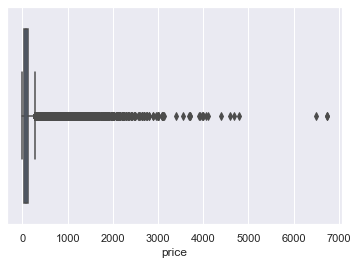

In [29]:
# Detección de outliers
sns.boxplot(x=Order_items.price)

In [30]:
# Rango intercuartil
IQR = Order_items.price.quantile(0.75) - Order_items.price.quantile(0.25)
lower_lim = Order_items.price.quantile(0.25) - 2.5 * IQR
upper_lim = Order_items.price.quantile(0.75) + 2.5 * IQR
outliers_low = Order_items.price < lower_lim
outliers_up = Order_items.price > upper_lim
print("Total de outliers:",(len(Order_items.price[outliers_low]) + len(Order_items.price[outliers_up])))
Order_items[~(outliers_low | outliers_up)].shape

Total de outliers: 5035


(107615, 7)

In [31]:
# Z-Score
z = np.abs(stats.zscore(Order_items.price))
outliers = Order_items.price[(z > 3)].index
print("Total de outliers:", len(outliers))
Order_items.drop(outliers).shape

Total de outliers: 1966


(110684, 7)

In [32]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_items.describe(include=['O'])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [33]:
# Revisión de la columna order_item_id; expresa la cantidad incremental de artículos presentes en una misma orden
Order_items[['order_id', 'order_item_id']].groupby(['order_id']).count().sort_values('order_item_id', ascending=False)

,order_item_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [34]:
# Revisión de la columna product_id; cuál es el producto más vendido
Order_items[['order_id','product_id']].groupby(['product_id']).count().sort_values('order_id', ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [35]:
# Revisión de la columna product_id; cuánto facturó el producto más vendido
Order_items[['price','product_id']].groupby(['product_id']).sum().sort_values('price', ascending=False)

,price
product_id,
bb50f2e236e5eea0100680137654686c,63885.00
6cdd53843498f92890544667809f1595,54730.20
d6160fb7873f184099d9bc95e30376af,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
99a4788cb24856965c36a24e339b6058,43025.56
...,...
2e8316b31db34314f393806fd7b6e185,2.99
680cc8535be7cc69544238c1d6a83fe8,2.90
8a3254bee785a526d548a81a9bc3c9be,2.55


In [36]:
# Revisión de la columna seller_id; cuál es el vendedor con más órdenes
Order_items[['order_id','seller_id']].groupby(['seller_id']).count().sort_values('order_id', ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [37]:
# Revisión de la columna seller_id; cuánto sumaron las órdenes de cada vendedor
Order_items[['price','seller_id']].groupby(['seller_id']).sum().sort_values('price', ascending=False)

,price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
53243585a1d6dc2643021fd1853d8905,222776.05
4a3ca9315b744ce9f8e9374361493884,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,194042.03
7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


## Order_payments

In [38]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_payments = pd.read_csv('Datasets_original/olist_order_payments_dataset.csv');

In [39]:
Order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
85055,41b5ca83bef6301acf0208d83596fade,1,credit_card,1,65.39
82914,af88e18cdef0e6a040d51ed74427f9a3,1,credit_card,1,37.83
78149,9bbd8492ba2666b178725e2bfc1a8349,1,credit_card,1,36.69
22853,2ea63ebcda77acab196880c1dfb295d1,1,credit_card,4,92.38
45590,83649f5bef804caee20776fbd535d29d,1,credit_card,2,37.20
33404,acbe08c609ccb7901159882c5a558cfa,1,credit_card,2,36.78
47025,e677ab34eb52c66dd39e65b9aa84fe4c,1,boleto,1,922.02
103719,c24d2f7d4ac8f5e961e730da59972c7d,1,credit_card,1,59.93
2735,394ff86ee81814bb5f88c7e8ad2812b3,2,voucher,1,20.00
62953,9a75fbfdd0e2d8c9285edc0b65879551,1,credit_card,1,73.77


In [40]:
# tamaño del dataset
Order_payments.shape

(103886, 5)

In [41]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
# descripcion de las columnas numéricas
Order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [43]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_payments.describe(include=['O'])

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


- El comportamiento de los pagos. La utilidad dependerá de la propuesta del PO

## Order_reviews

In [44]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_reviews = pd.read_csv('Datasets_original/olist_order_reviews_dataset.csv')
Order_reviews.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
70411,414c0ef7c48824d30878d0b05a071e3e,57c2914d78f0d7f4b76089b7844e77ea,3,NaN,Comprei o produto e veio alguns pincéis de out...,2017-07-15 00:00:00,2017-07-18 13:59:11
59192,fdd2dc81f7a4653b8a708f4ee9f9b03a,2af637f73b0d20f5ccc52704b0ae766b,5,NaN,NaN,2018-06-12 00:00:00,2018-06-15 12:42:47
4890,343ab3ac9134ebf1607332ec957f2e3b,e13722c0887b5fecfbcf9771b23ddf36,4,NaN,Entregue no prazo e produto atende bem a neces...,2018-03-09 00:00:00,2018-03-09 23:10:47
23119,0a6733bda76a344617547b71c56c1b91,91ea7a06795c4dc4544b5ef64d3e56e2,5,NaN,NaN,2017-12-08 00:00:00,2017-12-17 11:50:40
65909,783ee45f0e6bfab58181e52dcbc6ac38,e02b879dd0de39526ef78a55f65fa922,5,NaN,NaN,2018-04-21 00:00:00,2018-04-24 13:27:44
64136,5ed1b8b55589f1437707fc894be082d7,2805499c211b52dfc1e64a1349ef45e2,5,NaN,NaN,2018-03-18 00:00:00,2018-03-18 12:14:08
7358,0280208daa05d4fbaa9ae4525a6a76a1,e67b282bce4a6e7095116b351ddb81e7,5,NaN,"Produto de excelente qualidade, entregue antes...",2018-06-26 00:00:00,2018-06-27 00:32:58
59025,267baa054eeca55460962aa0cb50df81,00e4050fe32e786290a29c61141e979f,5,NaN,NaN,2017-08-25 00:00:00,2017-08-26 02:15:59
70794,099fad43ec35d5ccb215c5e2ced75028,3e40fd20e1f24da8d88521364c41136d,5,NaN,NaN,2018-06-26 00:00:00,2018-06-27 01:31:39
8523,5b500b6c1601909a030fffa674ab9709,1f8956ea49b1eba62dd40aa5f7ac9133,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 14:49:07


In [45]:
# tamaño del dataset
Order_reviews.shape

(99224, 7)

In [46]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
# descripcion de las columnas numéricas
Order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [48]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_reviews.describe(include=['O'])

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


In [49]:
# cuantos datos nulos por columna se encuentran
Order_reviews.isna().sum()*100/Order_reviews.shape[0]

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

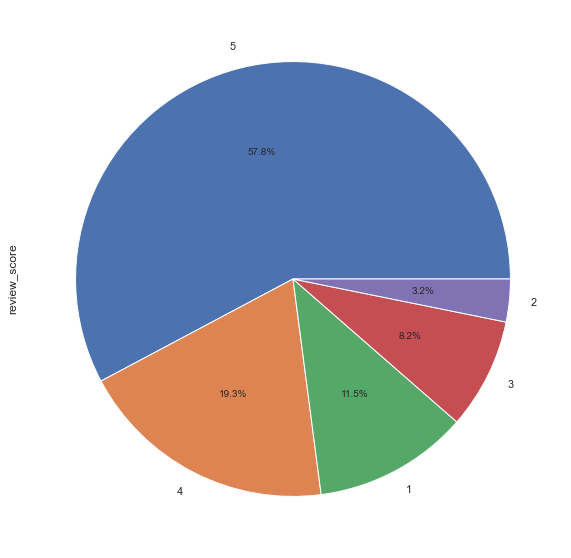

In [50]:
val=Order_reviews.review_score.value_counts()
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

- La utilidad de esta tabla dependerá del objetivo propuesto.

## Orders

In [51]:
# carga del dataset y muestreo de 10 registros aleatorios
Orders = pd.read_csv('Datasets_original/olist_orders_dataset.csv')
Orders.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
81341,73cb7b68ebaea36d0678e616423e2618,f17efc061891b8702568adecffa94803,delivered,2018-01-27 19:11:25,2018-01-27 19:19:47,2018-01-31 22:46:31,2018-02-07 18:52:29,2018-03-05 00:00:00
42803,059511087f2394ebd55a674537a7c2cc,c5c273dc7587ce40423e6c791c339e79,delivered,2018-02-14 11:42:55,2018-02-16 07:50:29,2018-02-21 18:29:16,2018-03-28 19:38:43,2018-03-12 00:00:00
62051,5b71035c88f2a3897eb7f0f73edb3f33,aa806755bf5b7c312a0243ef100e547c,delivered,2017-09-21 09:43:31,2017-09-21 09:55:15,2017-09-27 17:25:31,2017-10-09 22:16:39,2017-10-25 00:00:00
6858,74fa746e5f8f120282d292d136d7eb8d,b5d1c63873b83d5f19219f4c99c4f957,delivered,2017-11-28 18:37:29,2017-11-28 18:56:57,2017-11-30 00:13:25,2017-12-13 16:16:59,2017-12-19 00:00:00
63401,2a63db5c526afb1ee1c53ef2ba5dad2c,95b4155db0f673fad4d9e793396e4bf0,delivered,2017-09-11 14:00:09,2017-09-11 14:23:36,2017-09-14 18:59:30,2017-10-05 17:28:44,2017-10-05 00:00:00
50540,d07177bc097beb1a6d82f01bdc6d6eec,79b4c20b6bd8e73a360328f99c5242a4,delivered,2018-07-14 01:09:22,2018-07-14 01:23:59,2018-07-24 11:22:00,2018-07-27 20:13:30,2018-08-13 00:00:00
80292,a2ade02b971edbc56f74ca5ee48e766e,364494c896e14af987f4ace014b15533,delivered,2018-01-13 12:10:40,2018-01-16 03:34:40,2018-01-17 13:13:15,2018-01-18 16:32:27,2018-01-30 00:00:00
87243,c11457253eefe1635e2c7acbf249aa1a,93c614a0e7397b6bf4173f3c62cc0c87,delivered,2017-11-06 14:13:32,2017-11-06 15:31:26,2017-11-07 22:38:38,2017-11-13 21:28:37,2017-11-29 00:00:00
32860,8e2fb2dbedcc04e6230d18b3edd75574,67f89d8b4ac09476bb20a89c98a9f928,delivered,2017-09-28 10:05:03,2017-09-28 10:24:57,2017-10-02 23:38:36,2017-10-09 20:21:28,2017-10-24 00:00:00
40217,e8cf1ea2e67a4904539450c50755d2ef,7ec9df8ea019ba4504e5535a7c9da8c4,delivered,2018-01-26 14:26:58,2018-01-26 14:35:22,2018-02-01 01:14:53,2018-02-07 20:19:00,2018-02-20 00:00:00


In [52]:
#En la columna orders se puede agregar una nueva columna que contenga la cantidad de dias entre
#la aprobacion de una compra y su entrega al cliente.

Orders['Tiempo_entrega'] = pd.to_datetime(Orders["order_approved_at"]) - pd.to_datetime(Orders['order_delivered_customer_date'])

#Transformar los valores a solo días
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].apply(lambda x: x.days + (x.seconds // 86400)) 

In [53]:
# tamaño del dataset
Orders.shape

(99441, 9)

In [54]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   Tiempo_entrega                 96462 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [55]:
# descripcion de las columnas numéricas
Orders.describe()

,Tiempo_entrega
count,96462.000000
mean,-12.642844
std,9.520822
min,-209.000000
25%,-16.000000
50%,-10.000000
75%,-7.000000
max,6.000000


In [56]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Orders.describe(include=['O'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


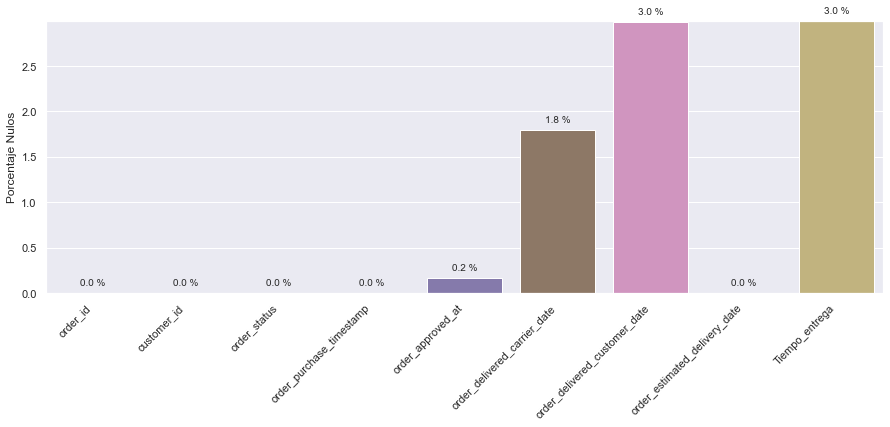

In [57]:
# cuantos datos nulos por columna se encuentran
valores=Orders.isna().sum()*100/Orders.shape[0]

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Products

In [58]:
# carga del dataset y muestreo de 10 registros aleatorios
Products = pd.read_csv('Datasets_original/olist_products_dataset.csv')
Products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
30838,e00a60cd14eb7299be9e8ad1dfe1c578,moveis_decoracao,25.0,413.0,1.0,13250.0,52.0,52.0,52.0
26727,3a2b04bd67f105099d662e522bec56e9,agro_industria_e_comercio,38.0,397.0,1.0,3275.0,35.0,37.0,19.0
31598,d9440686faf90019c12440cb9c783e4d,utilidades_domesticas,37.0,696.0,1.0,1375.0,20.0,15.0,21.0
12651,8060b4a1aeecf25a9ada1fc0f6e142dc,moveis_decoracao,41.0,94.0,5.0,200.0,16.0,5.0,20.0
18512,20e5127b0dda6370dd7795b2952da13a,moveis_decoracao,58.0,2043.0,4.0,1450.0,69.0,11.0,11.0
21339,36a9cdf8fb5ea34c5d74cbe8578c119c,moveis_decoracao,59.0,438.0,1.0,850.0,30.0,4.0,20.0
13154,24b73bfbbae23b718cea4e1efb2a76af,brinquedos,57.0,1283.0,3.0,800.0,32.0,5.0,24.0
24344,0f820791c5bd8fc3b05f6b897877fb1f,construcao_ferramentas_seguranca,60.0,972.0,1.0,1000.0,50.0,25.0,30.0
5662,ba7e06201e60d29279c7f11d689792bb,relogios_presentes,39.0,587.0,2.0,325.0,18.0,13.0,16.0
11185,c327898dd247165a50bd1d6a2a38347b,bebes,55.0,2325.0,3.0,1600.0,40.0,20.0,40.0


In [59]:
# tamaño del dataset
Products.shape

(32951, 9)

In [60]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [61]:
# descripcion de las columnas numéricas
Products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [62]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Products.describe(include=['O'])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


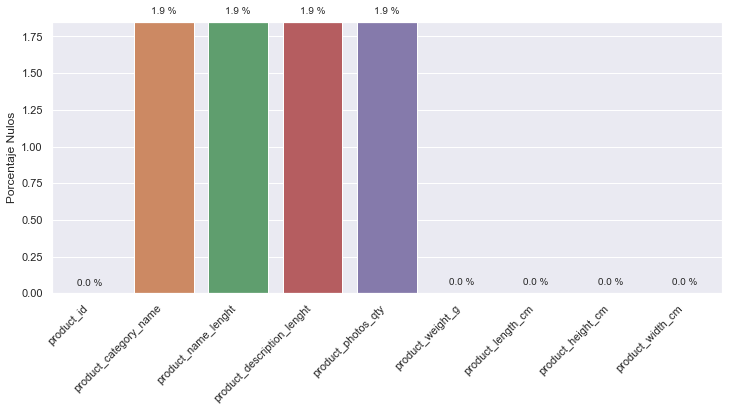

In [63]:
# cuantos datos nulos por columna se encuentran
valores=Products.isna().sum()*100/Products.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Sellers

In [64]:
# carga del dataset y muestreo de 10 registros aleatorios
Sellers = pd.read_csv('Datasets_original/olist_sellers_dataset.csv')
Sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
648,252e76235acb79183cfca6e34f13337d,13090,campinas,SP
110,eb72802c83dc7547529c9546d1a9b8ef,13504,rio claro,SP
68,7e93a43ef30c4f03f38b393420bc753a,6429,barueri,SP
1569,bf84056e679dbe9c69929847a40e338f,2537,sao paulo,SP
137,34aefe746cd81b7f3b23253ea28bef39,81210,curitiba,PR
343,d2572f31e9023e9850ef986a636ff9bf,30640,belo horizonte,MG
86,669ae81880e08f269a64487cfb287169,89160,rio do sul,SC
1013,d4828feed4cda2cd9d6b37899a95a71e,63020,juzeiro do norte,CE
1017,33ac3e28642ab8bda860a2f693000e78,6717,cotia,SP
2601,4fb41dff7c50136976d1a5cf004a42e2,44002,feira de santana,BA


In [65]:
# tamaño del dataset
Sellers.shape

(3095, 4)

In [66]:
# revisamos la distribución de las ciudades (mejor con un gráfico)
Sellers.seller_city.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [67]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [68]:
# descripcion de las columnas numéricas
Sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [69]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Sellers.describe(include=['O'])

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


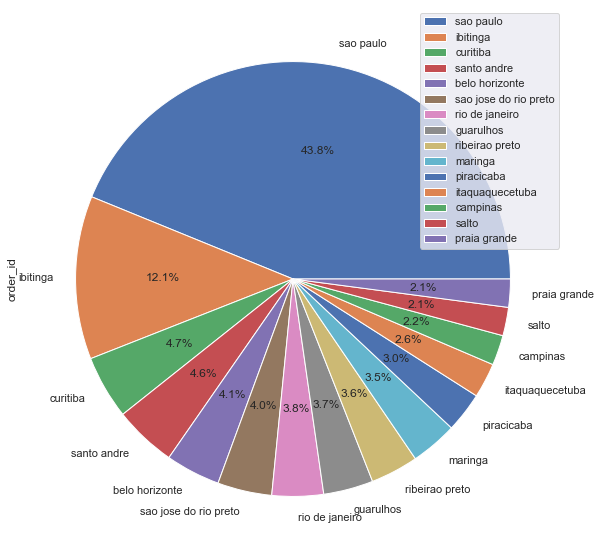

In [70]:
# Revisamos uniendo las tablas, cuál es la ciudad con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_city','order_id']].groupby(['seller_city']).count().sort_values('order_id', ascending=False).head(15)

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

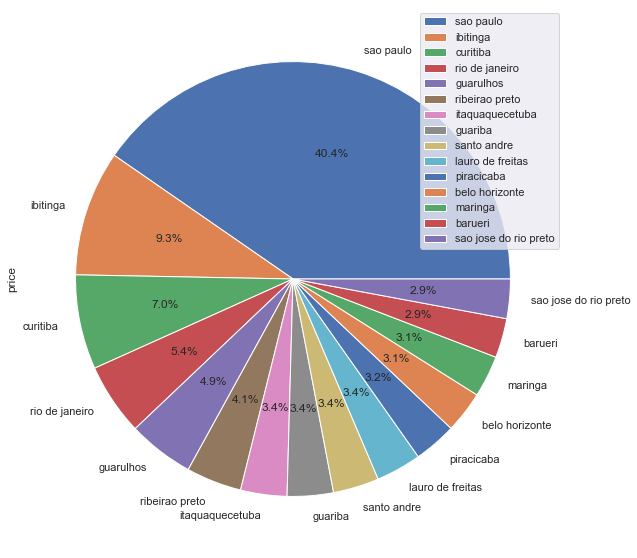

In [71]:
# Revisamos uniendo las tablas, cuál es la ciudad con el monto mayor en ventas
val=Sellers.merge(Order_items)[['seller_city','price']].groupby(['seller_city']).sum().sort_values('price', ascending=False).head(15)
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

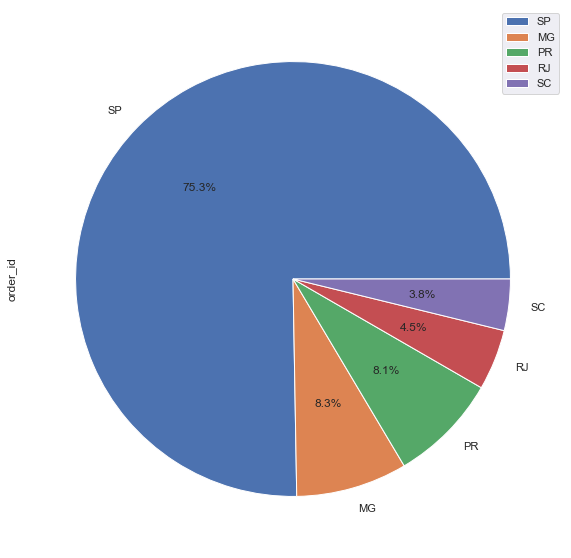

In [72]:
# Revisamos uniendo las tablas, cuál es la provincia con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_state','order_id']].groupby(['seller_state']).count().sort_values('order_id', ascending=False).head()

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

## Product_category_name_translation

In [73]:
# carga del dataset y muestreo de 10 registros aleatorios
Product_category_name_translation = pd.read_csv('Datasets_original/product_category_name_translation.csv')
Product_category_name_translation.sample(10)

,product_category_name,product_category_name_english
5,esporte_lazer,sports_leisure
35,casa_conforto,home_confort
36,construcao_ferramentas_ferramentas,costruction_tools_tools
52,sinalizacao_e_seguranca,signaling_and_security
62,casa_conforto_2,home_comfort_2
53,pcs,computers
47,moveis_quarto,furniture_bedroom
3,cama_mesa_banho,bed_bath_table
38,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
68,fraldas_higiene,diapers_and_hygiene


In [74]:
# tamaño del dataset
Product_category_name_translation.shape

(71, 2)

In [75]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [76]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Product_category_name_translation.describe(include=['O'])

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Combinacion de datasets y creacion de matriz de correlacion

In [77]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Closed_deals,on="seller_id",how="left")

In [78]:
#Lista de columnas a las que se le aplica label encoder
list_columns = datasets_combinados.select_dtypes(include='object').columns


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Se aplica label encoder a todas las columnas
for col in list_columns:
    datasets_combinados[col] = le.fit_transform(datasets_combinados[col])

<AxesSubplot:>

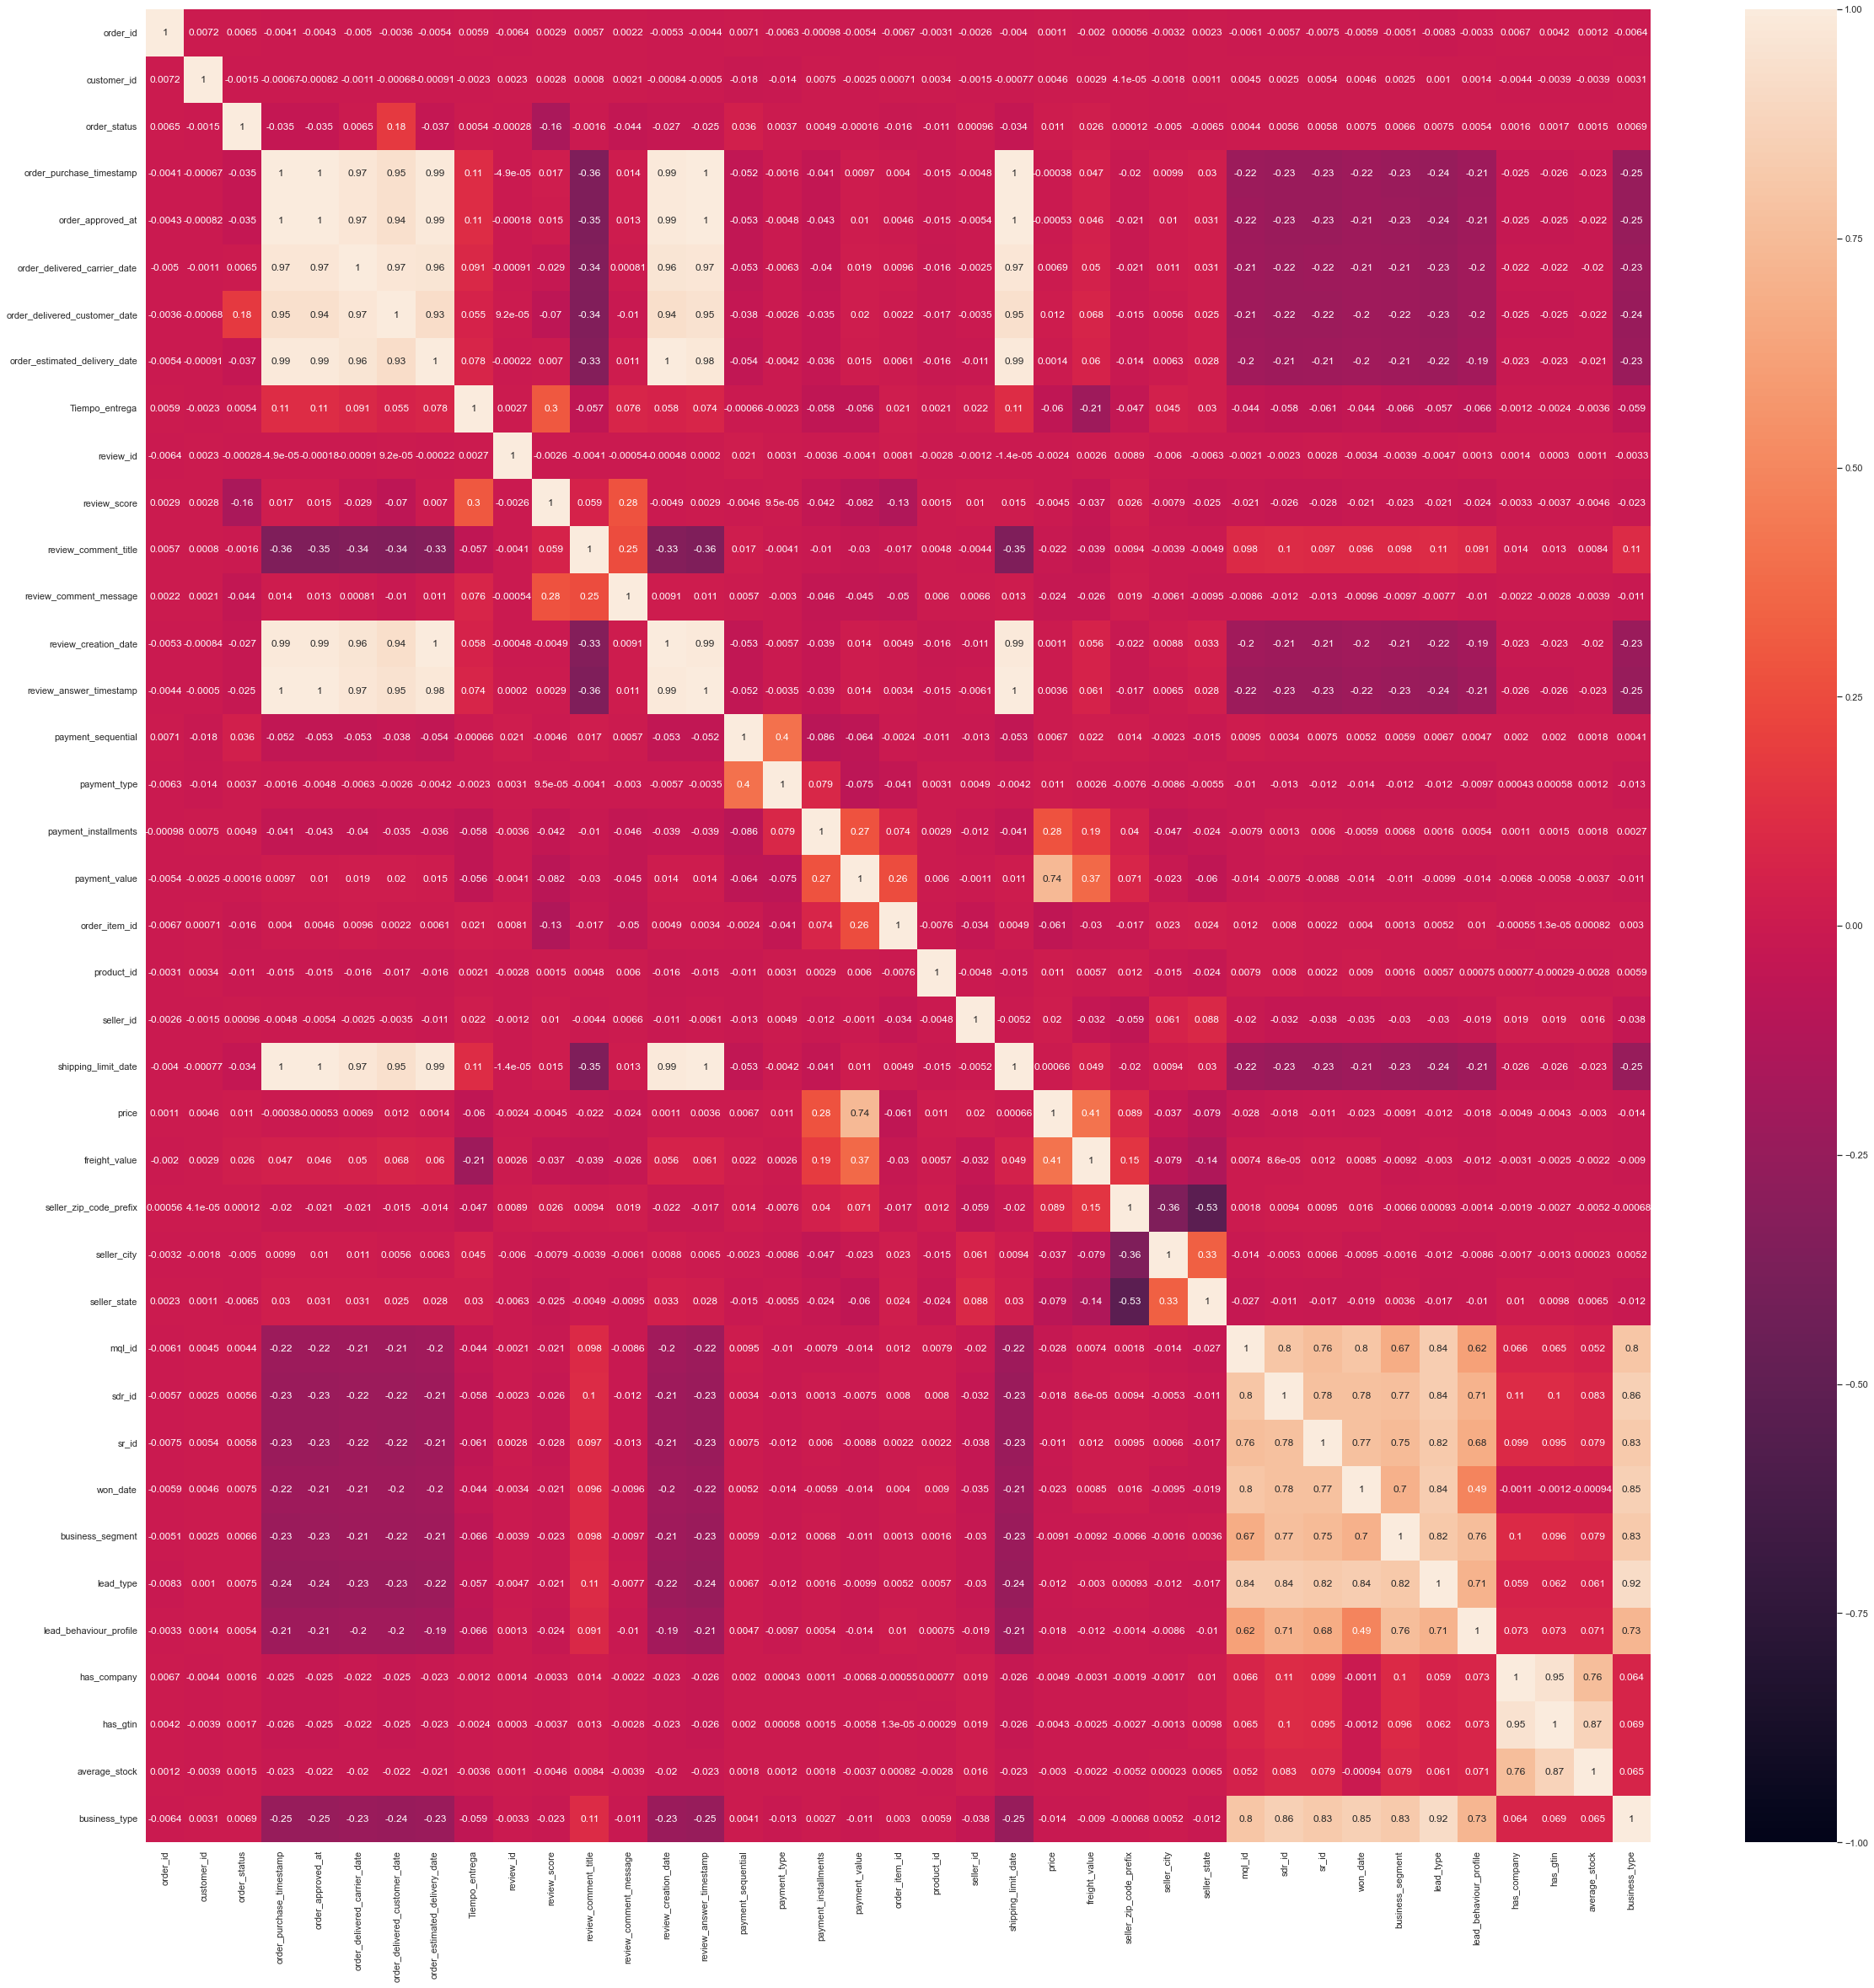

In [79]:
#se crea la matriz de correlacion
corr=datasets_combinados.drop(["declared_monthly_revenue","declared_product_catalog_size"],axis=1).corr()

#se grafica con un mapa de calor
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

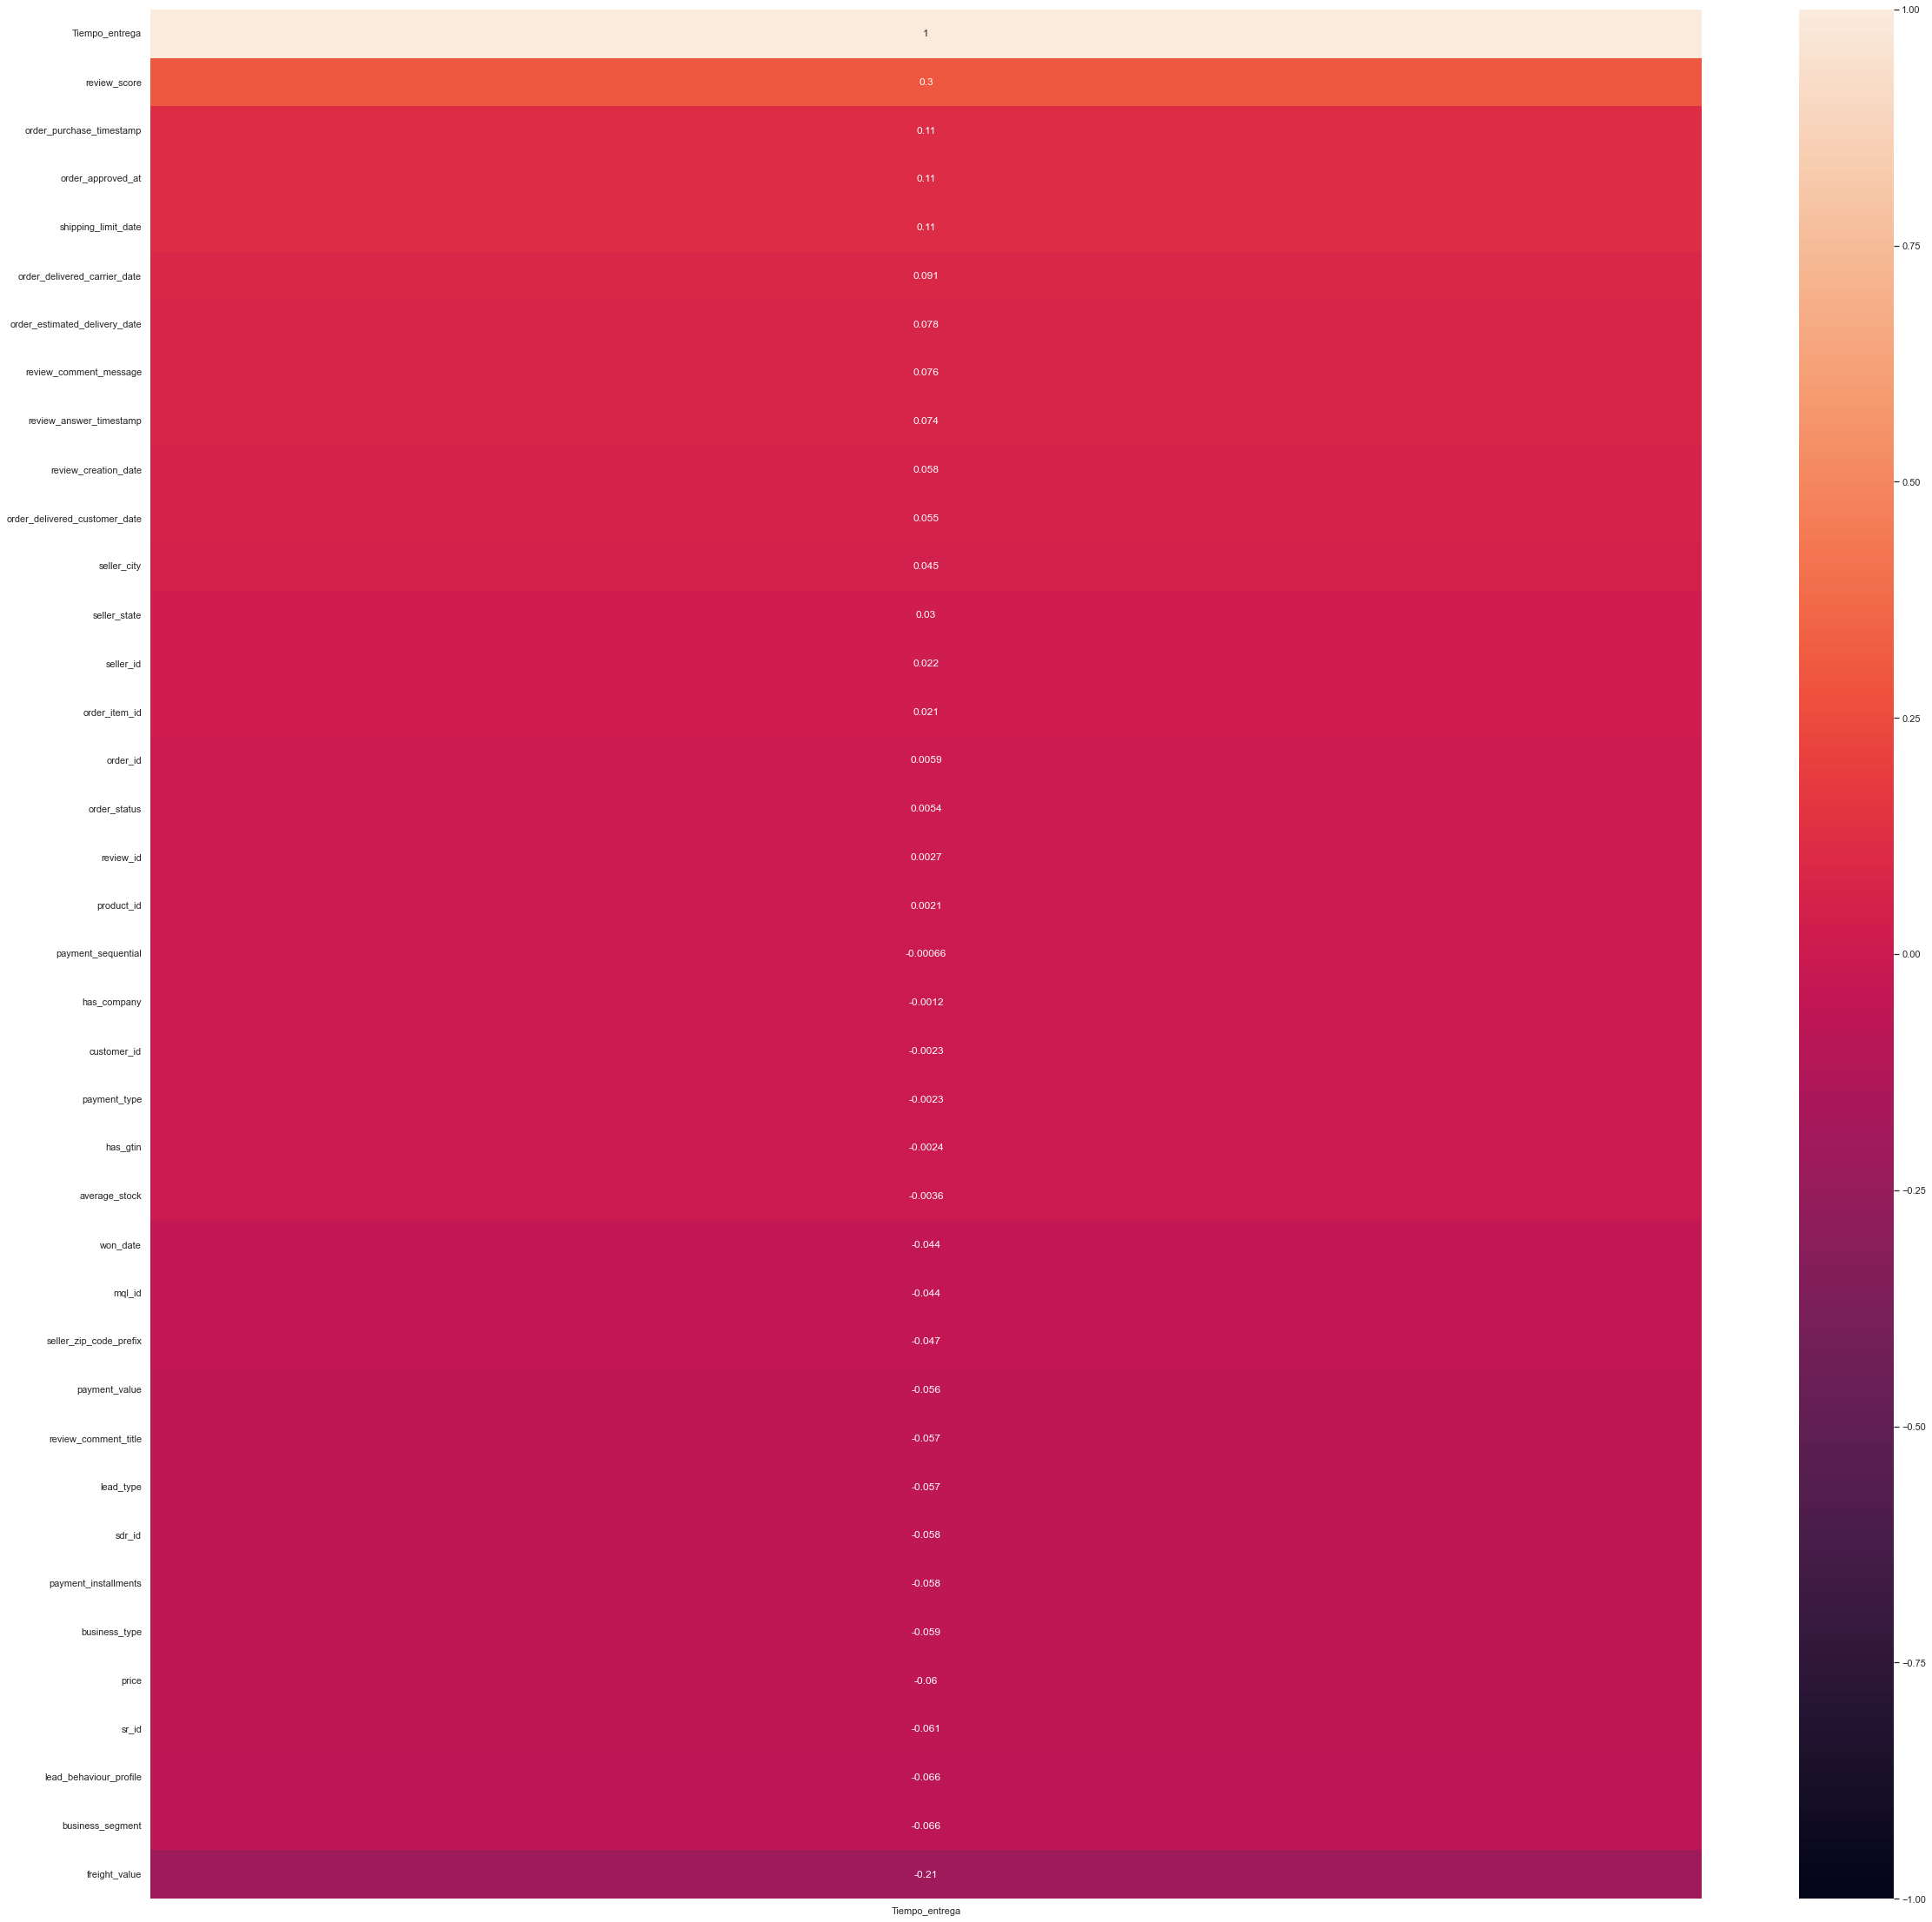

In [80]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="Tiempo_entrega",ascending=False)[["Tiempo_entrega"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)

<AxesSubplot:>

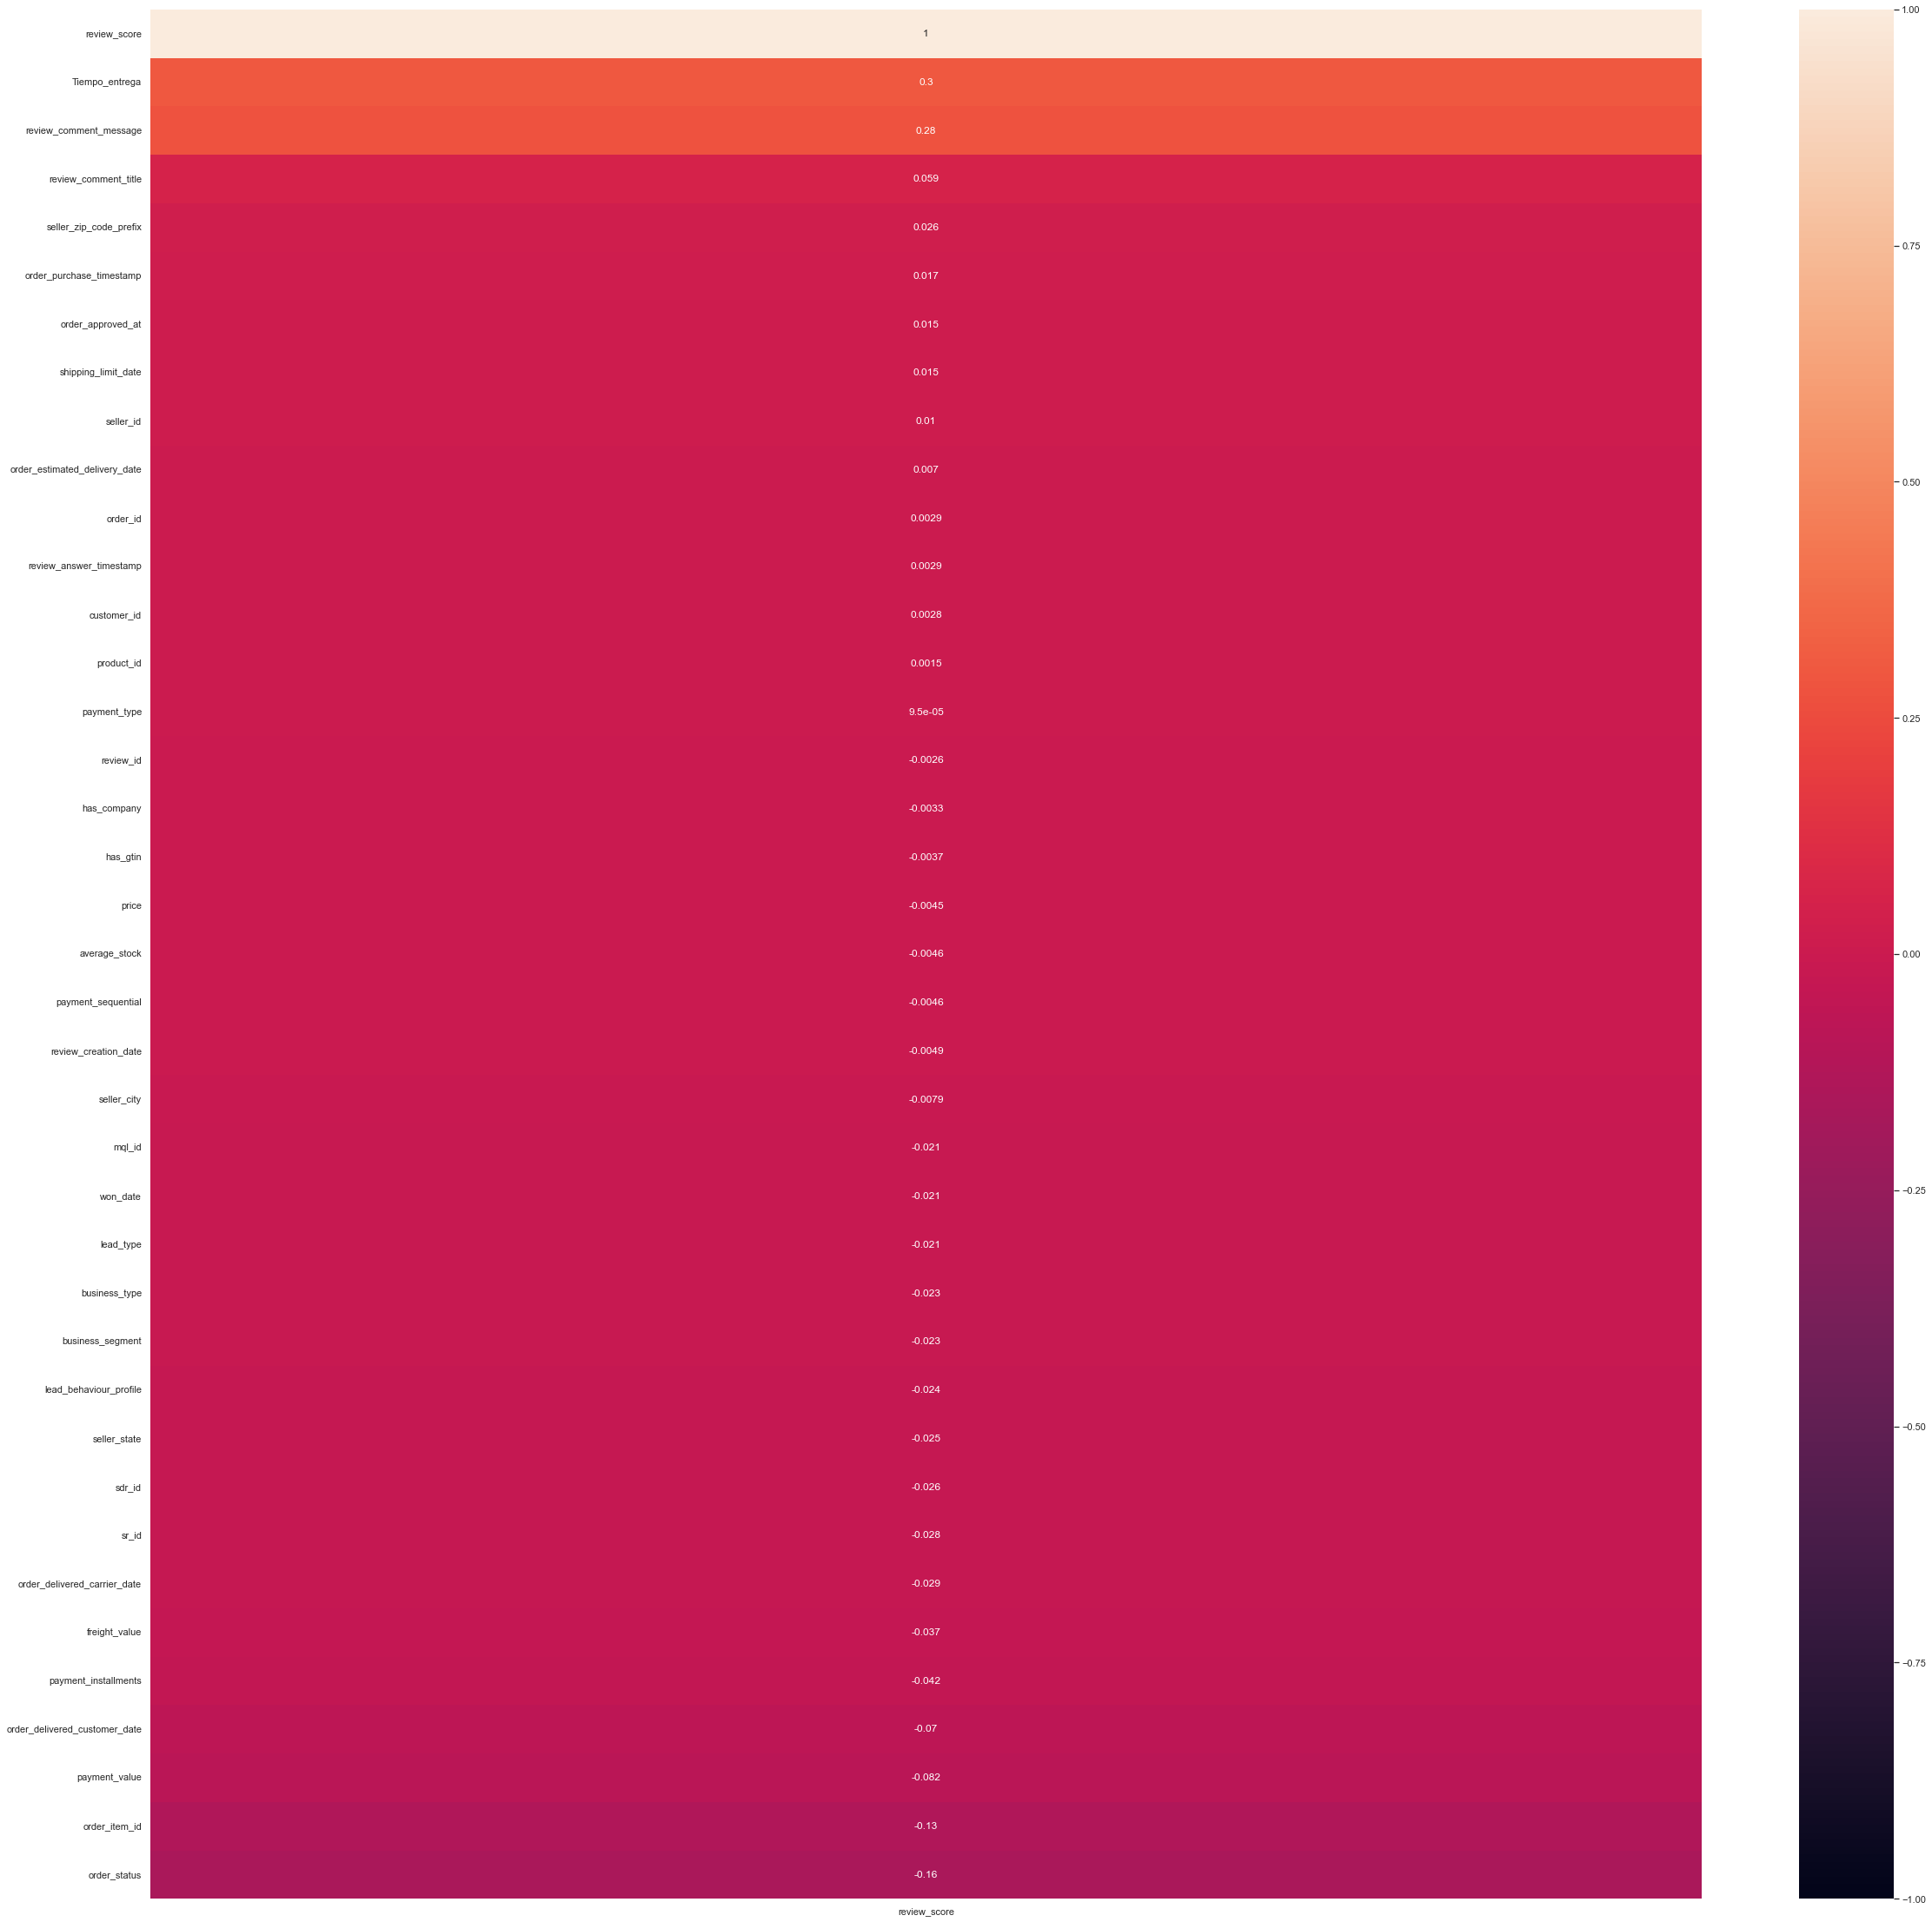

In [81]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr2=corr.sort_values(by="review_score",ascending=False)[["review_score"]]
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr2,annot=True,vmin=-1,vmax=+1)

## Tabla valoración vendedor

Armaremos una tabla que nos permita darle una valoración a cada vendedor, basado en diferentes unidades:

- Location (?)
- Amount of distinct products
- Type of products (?)
- Time to fill order
- Review score
- Number of orders
- Number of sales
- Gross income
- Net income

In [82]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Products,on="product_id")

In [83]:
datasets_combinados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Tiempo_entrega,review_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,-3.0,b46f1e34512b0f4c74a72398b03ca788,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,-5.0,dc90f19c2806f1abba9e72ad3c350073,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [84]:
# Se seleccionan columnas con ID para modificar
columnas = [0,1,9,19,20,21]
datasets_combinados.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Tiempo_entrega', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [85]:
#Se aplica label encoder a las columnas de ID
for col in columnas:
    datasets_combinados[datasets_combinados.columns[col]] = le.fit_transform(datasets_combinados[datasets_combinados.columns[col]])

In [86]:
Valoracion = pd.DataFrame(columns=['seller_id'])

In [87]:
Valoracion.seller_id = datasets_combinados.seller_id.unique()
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_city']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_state']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'product_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'product_category_name']].groupby(['seller_id']).nunique(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'Tiempo_entrega']].groupby(['seller_id']).mean().round(2), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'review_score']].groupby(['seller_id']).mean().round(2), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'order_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'price']].groupby(['seller_id']).sum(), on= 'seller_id')

In [88]:
Valoracion.rename({'product_id':'distinct_prod', 'Tiempo_entrega':'delivery_avg', 'product_category_name':'distinct_categories',\
                   'review_score':'review_avg', 'order_id':'total_orders', 'price':'total_income'}, axis=1, inplace=True)

In [89]:
Valoracion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller_id            3090 non-null   int32  
 1   seller_city          3090 non-null   object 
 2   seller_state         3090 non-null   object 
 3   distinct_prod        3090 non-null   int64  
 4   distinct_categories  3090 non-null   int64  
 5   delivery_avg         2965 non-null   float64
 6   review_avg           3090 non-null   float64
 7   total_orders         3090 non-null   int64  
 8   total_income         3090 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 229.3+ KB


In [92]:
Valoracion.to_csv('Datasets_resultantes\Valoraciones.csv')